<h4 align="right">19th of February 2019</h4>
<h1 align="center">Neural Networks and Deep Learning (CIE 555)</h1>
<h2 align="center">Lab 3: PyTorch</h2> <br>

###(1) Introduction to PyTorch

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.autograd import Variable

In [17]:
#Tensors
#Can be initialized from list, tuple, numpy array
x = [[1,2,3],[4,5,6]]
xten = torch.tensor(x, dtype=torch.float32) #xten = torch.tensor(x, dtype=torch.float32, device=torch.device('cpu'))
print(xten)
print("")
print(xten.size()) #like .shape in tensorflow and numpy
print(xten.size()[1])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

torch.Size([2, 3])
3


In [16]:
#Different tensor initializations
x1 = torch.rand((2,3))
x2 = torch.zeros((1,2))
x2_like = torch.randn_like(x2)
print(x2)
print(x2_like)
print(torch.numel(x1))

tensor([[0., 0.]])
tensor([[0.8183, 3.0846]])
6


In [15]:
#Transpose and Inverse
x1 = torch.randn((3,3))
print(x1)
print()
print(torch.t(x1))
print()
print(torch.inverse(x1))

tensor([[-0.5987, -1.3442,  0.0800],
        [ 0.2791,  0.0136,  0.2476],
        [-2.3027, -0.3955, -1.3944]])

tensor([[-0.5987,  0.2791, -2.3027],
        [-1.3442,  0.0136, -0.3955],
        [ 0.0800,  0.2476, -1.3944]])

tensor([[  0.4166, -10.0509,  -1.7609],
        [ -0.9543,   5.3736,   0.8995],
        [ -0.4173,  15.0735,   1.9356]])


In [14]:
#Concatenation
x0 = torch.tensor([[1,2,3]])
x = torch.cat((x0,x0),0)
print(x)
print()
#Select certain columns or rows
ind = torch.index_select(x,1,torch.tensor([0,2]))
print(ind)

tensor([[1, 2, 3],
        [1, 2, 3]])

tensor([[1, 3],
        [1, 3]])


In [13]:
#Reshaping
x = torch.tensor([[1,2,3],[4,5,6]])
y = torch.reshape(x,(1,-1))
print(y)

tensor([[1, 2, 3, 4, 5, 6]])


In [12]:
###
x = torch.randn((2,3))
print(x)
x = torch.clamp(x,min=0)
print(x)

tensor([[ 0.9606, -0.0812, -0.4619],
        [-0.3312, -1.0154,  0.1449]])
tensor([[0.9606, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1449]])


In [11]:
#Mathematical Operations
x = torch.tensor([[-1,2,3],[4,5,6]])
y = torch.tensor([[2,2,2],[2,2,2]])
z = torch.add(x,y) #Addition
z = torch.sub(x,y) #Subtraction
z = torch.mul(x,y) #Element-wise multiplication
z = torch.matmul(x,torch.t(y)) #Matrix multiplication
z = torch.div(x,y) #Element-wise division
z = torch.abs(x)
#z = torch.mean(x)
#z = torch.exp(x)
z = torch.pow(x,y)
#z = torch.sigmoid(x)
z = torch.sum(y)
print(z)

tensor(12)


###(2) Introduction to nn and optim

In [19]:
##Linear layer applies x*W.T+b
a0 = torch.randn((130,4))
L1 = nn.Linear(4,5)
z1 = L1(a0)
print(z1.size())

torch.Size([130, 5])


In [0]:
##Activation functions
z1 = torch.randn((130,5))
sig1 = nn.Sigmoid()
#sig1 = nn.ReLU()
#sig1 = nn.LeakyReLU()
#sig1 = nn.Tanh()
a1 = sig1(z1)

#Softmax
#out1 = nn.Softmax()

In [21]:
##Feedforward in logistic regression
a0 = torch.randn((100,4))
L1 = nn.Linear(4,1)
z1 = L1(a0)
sig1 = nn.Sigmoid()
a11 = sig1(z1)

#OR

model = nn.Sequential(nn.Linear(4,1), nn.Sigmoid())
print(model)
a1 = model(a0)

print(a11.size())
print(a1.size())


Sequential(
  (0): Linear(in_features=4, out_features=1, bias=True)
  (1): Sigmoid()
)
torch.Size([100, 1])
torch.Size([100, 1])


In [0]:
##Back propagation
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 
optimizer.zero_grad() #zero gradients to not accumulate
#loss = lossfun(a1, y_train) #calculate loss
#loss.backward() #update weights based on loss
#optimizer.step() #update optimizer for next iteration

###(3) Implementing 2-layer Neural Network using PyTorch

####Imports

In [0]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import torch
import numpy as np
import matplotlib.pyplot as plt

####Data loading and preprocessing

In [0]:
iris = load_iris()
x = iris['data']
y = iris['target']
enc = OneHotEncoder(categories='auto')
y = enc.fit_transform(y.reshape(-1,1)).A.astype(np.float32)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

####Helper functions

In [0]:
def sigmoid(x, deriv=False):
  sig = torch.sigmoid(x)
  if deriv:
    sig = sig*(1-sig)
  return sig

####Converting numpy arrays to torch tensors

In [0]:
x_trainv = torch.tensor(x_train, requires_grad = False, dtype=torch.float32)
y_trainv = torch.tensor(y_train, requires_grad = False, dtype=torch.float32)
x_testv = torch.tensor(x_test, requires_grad = False, dtype=torch.float32)
y_testv = torch.tensor(y_test, requires_grad = False, dtype=torch.float32)

####Training

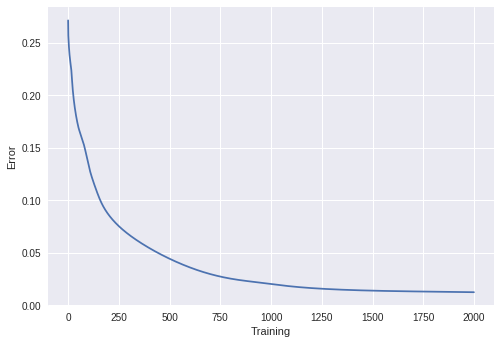

Training Accuracy 98.75%


In [39]:
n_in = x_trainv.size()[1]
n_h = 5
n_out = y_trainv.size()[1]


torch.manual_seed(1)
w0 = torch.randn((n_in,n_h))
w1 = torch.randn((n_h,n_out))

sigma = 0.01
errors = []

for i in range(2000):
  #Feed forward
  a0 = x_trainv
  a1 = sigmoid(torch.matmul(a0,w0))
  a2 = sigmoid(torch.matmul(a1,w1))
  
  #Back propagation using gradient descent
  a2_error = y_trainv - a2
  a2_delta = a2_error * sigmoid(a2, deriv=True)
    
  a1_error = torch.matmul(a2_delta,torch.transpose(w1,0,1))
  a1_delta = a1_error * sigmoid(a1, deriv=True)
    
  w1 += torch.matmul(torch.transpose(a1,0,1),a2_delta) * sigma 
  w0 += torch.matmul(torch.transpose(a0,0,1),a1_delta) * sigma 
  
  ####### TO BE DONE ######### 10% Time: 4 mins
  #Write the error formula given the the error between the output layer and the labels: (a2_error)
  error=torch.mean((a2_error)**2).detach().item()

  ############################
  errors.append(error)
  accuracy = (1 - error) * 100
  ################
 


#Plot the accuracy graph
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy " + str(round(accuracy,2)) + "%")
  


####Validation

In [38]:
#Validation
torch.manual_seed(1)

a0t = x_testv
a1t = sigmoid(torch.matmul(a0t,w0))
a2t = sigmoid(torch.matmul(a1t,w1))
a2_errort = y_testv - a2t
error=torch.mean((a2_errort)**2).detach().item()



####### TO BE DONE ######### 10% Time: 7 mins
#Write the validation line codes to test your model




############################

accuracy = (1 - error) * 100
print("Validation Accuracy " + str(round(accuracy,2)) + "%")

Validation Accuracy 97.88%


###(4) Implementing 2-layer Neural Network using nn and optim

####Imports

In [0]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt 

####Data loading

In [0]:
iris = load_iris()
x = iris['data']
y = iris['target']
enc = OneHotEncoder(categories='auto')
y = enc.fit_transform(y.reshape(-1,1)).A.astype(np.float32)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

####Converting numpy arrays into torch.tensor

In [0]:
x_trainv = torch.tensor(x_train, requires_grad = False, dtype=torch.float32)
y_trainv = torch.tensor(y_train, requires_grad = False, dtype=torch.float32)
x_testv = torch.tensor(x_test, requires_grad = False, dtype=torch.float32)
y_testv = torch.tensor(y_test, requires_grad = False, dtype=torch.float32)

####Building model, loss function, and back propagation

In [0]:
num_in = x.shape[1]
num_h = 5
num_out = y.shape[1]
learning_rate=0.001
model = nn.Sequential()
f0n = nn.Linear(num_in, num_h)
f1n=nn.Linear(num_h, num_out)
sig=nn.Sigmoid()

model = []
model.append(f0n)
model.append(sig)
model.append(f1n)
model.append(sig)

net = nn.Sequential(*model)
######## TO BE DONE ########## 15% Time: 5 mins
#Build your model 


##############################

criterion = nn.MSELoss()
criterion2 = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)  

######## TO BE DONE ########## 15% Time: 4 mins
#Define your optimization module. Use Adam optimization

##############################

####Running model

[0.26459062 0.26417854 0.26376754 ... 0.00787736 0.00787645 0.00787555]


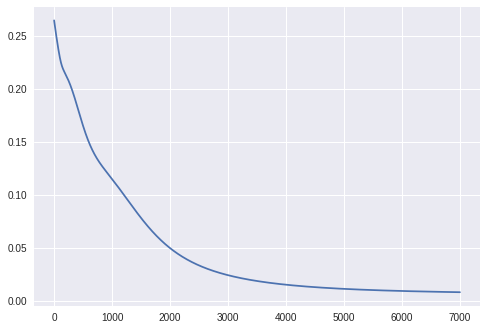

Training accuracy = 99.21 %


In [81]:
all_losses = []
for num in range(7000): #7000 iterations
  inputs, labels = x_trainv, y_trainv
  outputs = net(inputs)

  optimizer.zero_grad()
  loss = criterion(outputs, labels)
  loss.backward()
  optimizer.step()
  #print(loss.item())



  
  ######## TO BE DONE ########## 30% Time: 20 mins
  #Predict the output of your model
  #Calculate loss
  #Append the loss to all_losses list
  #Delete the accumulated gradient
  #update weights based on loss function you defined earlier
  all_losses.append(loss)

  
  
  
  
  ##############################
  
   #update optimizer for next iteration
    

all_losses = np.array(all_losses, dtype = np.float)
print(all_losses)
plt.plot(all_losses)
plt.show()

print("Training accuracy = " + str(round(100-(all_losses[-1]*100),2)) + " %")


####Validation

In [82]:
#Validation

######## TO BE DONE ########## 20% Time: 10 mins
#Validate your model for the test set, and then get the loss
test_out=net(x_testv)
loss = criterion(test_out, y_testv)


##############################

print("Validation accuracy = " + str(round(100-(loss.item()*100),2)) + " %")


Validation accuracy = 98.32 %
